<a href="https://colab.research.google.com/github/HyeranYang/STUDY_kaggle_data_analysis/blob/main/movie_%EC%A0%84%EC%B2%98%EB%A6%AC%2C_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EB%82%B4%EB%A7%98%EB%8C%80%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고자료

* 한글깨짐 현상 참고 : https://teddylee777.github.io/colab/colab-korean
* 자연수 e 그대로 표시하기 : https://zel0rd.tistory.com/33
* 2013년 1분기 한국영화 관객 수 ‘역대 최대’보도자료 : https://www.mcst.go.kr/kor/s_notice/press/pressView.jsp?pMenuCD=0302000000&pSeq=12654&pTypeDept=&pSearchType=01&pSearchWord=%EC%97%AD%EB%8C%80&pCurrentPage=1

    *  매년 1분기는 통상 비수기로 인식되어 왔으나, 국민들의 일상적인 문화로 자리 잡은 영화 관람 행위가 다양한 관객층을 고려한 기획과 흡입력 있는 스토리 등 한국영화의 전반적인 수준 향상과 맞물려 이러한 결과를 낸 것으로 분석되었다.
* 원핫인코딩 : https://growthj.link/python-%EC%9B%90-%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9one-hot-encoding-%EC%A0%95%EB%A6%AC-get_dummies/
* enumerate : https://www.daleseo.com/python-enumerate/

# Imports

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# 데이터 준비

## 데이터 설명

2010년대 한국에서 개봉한 한국영화 (trian:600개)에 대한 정보
* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [ ]:
train_csv = '/content/drive/MyDrive/Colab Notebooks/스터디/2. movie/movies_train.csv'

In [ ]:
test_csv = '/content/drive/MyDrive/Colab Notebooks/스터디/2. movie/movies_test.csv'

In [ ]:
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
test.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4


In [ ]:
movie = pd.concat([train, test], axis=0, ignore_index=True)

In [ ]:
movie.tail()   # concat이 잘 되었다.

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
838,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,NaN
839,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
840,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
841,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,NaN
842,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4,NaN


# EDA

## movie(전체) 탐색

In [ ]:
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 79.2+ KB


In [ ]:
movie.isnull().sum()

# dir_prev_bfnum : null 값이 너무 많아서 추후 삭제 예상

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    466
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num       243
dtype: int64

In [ ]:
movie.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,843.000000,3.770000e+02,843.000000,843.000000,843.000000,6.000000e+02
mean,103.438909,1.005380e+06,0.869514,153.481613,3.640569,7.081818e+05
std,68.339202,1.648883e+06,1.187647,164.832451,2.356094,1.828006e+06
min,40.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,3.173800e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.814592e+05,0.000000,89.000000,3.000000,1.259100e+04
75%,114.000000,1.239067e+06,2.000000,273.500000,4.000000,4.798868e+05
max,2015.000000,1.761531e+07,6.000000,869.000000,25.000000,1.426277e+07


### distributor 탐색

In [ ]:
movie['distributor'].value_counts()

CJ 엔터테인먼트         85
롯데엔터테인먼트          76
(주)마운틴픽쳐스         43
(주)쇼박스            38
인디스토리             37
                  ..
더픽쳐스/(주)마운틴픽쳐스     1
tvN                1
와이드릴리즈(주)          1
스크린조이              1
(주)씨타마운틴픽쳐스        1
Name: distributor, Length: 204, dtype: int64

In [ ]:
m = movie['distributor'].value_counts()[:10]
m

CJ 엔터테인먼트    85
롯데엔터테인먼트     76
(주)마운틴픽쳐스    43
(주)쇼박스       38
인디스토리        37
(주)NEW       36
골든타이드픽처스     27
(주) 케이알씨지    19
(주)키노아이      15
KT&G 상상마당    14
Name: distributor, dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

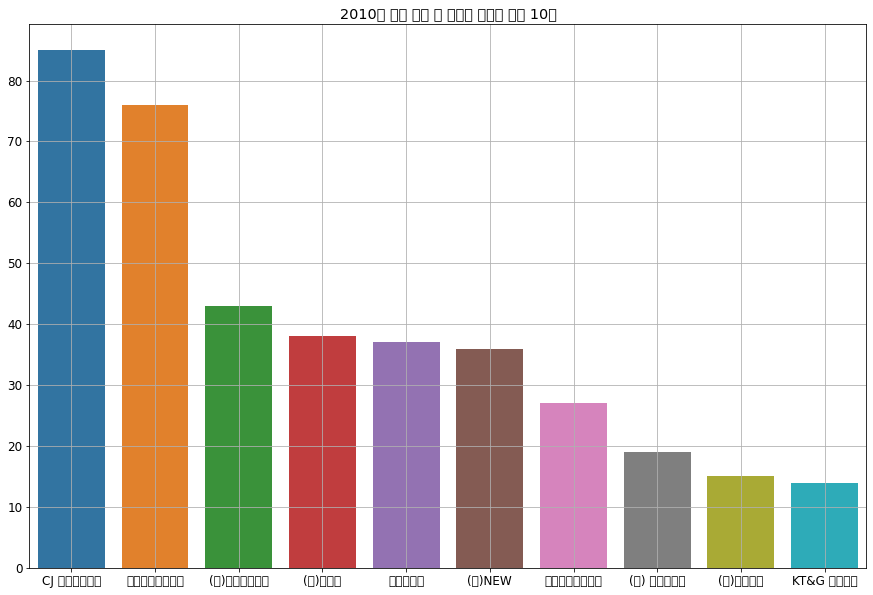

In [ ]:
plt.rc('font', size=12)
plt.figure(figsize=(15, 10))
sns.barplot(x=m.index, y=m.values)
plt.title('2010년 개봉 영화 중 배급사 빈도수 상위 10개')
plt.grid()
plt.show()

### genre 탐색

In [ ]:
movie['genre'].value_counts()

드라마       299
다큐멘터리     126
멜로/로맨스    117
코미디        76
공포         61
액션         49
느와르        39
애니메이션      29
미스터리       24
SF         14
뮤지컬         6
서스펜스        3
Name: genre, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

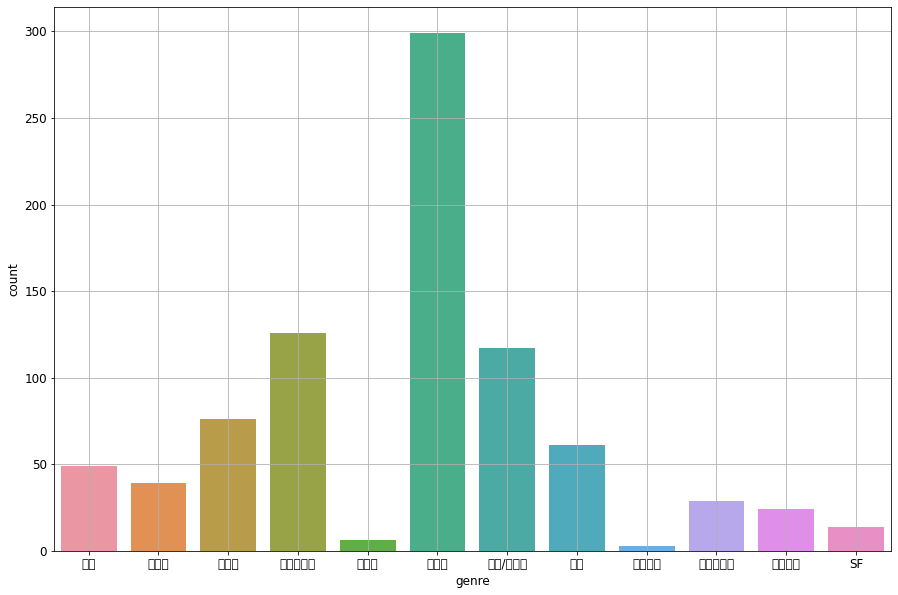

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x=movie['genre'])
plt.grid()
plt.show()

### release_time 탐색

In [ ]:
movie['release_time'].describe()

count            843
unique           377
top       2015-08-13
freq               8
Name: release_time, dtype: object

In [ ]:
movie['release_time'].value_counts()

2015-08-13    8
2015-10-22    8
2013-11-28    7
2015-09-10    7
2015-12-10    7
             ..
2013-04-03    1
2013-09-11    1
2012-09-27    1
2014-03-14    1
2015-07-02    1
Name: release_time, Length: 377, dtype: int64

* 속성을 문자열에서 datetime으로 변환

In [ ]:
movie['release_time'] = pd.to_datetime(movie['release_time'])

In [ ]:
movie.info()  # 속성이 datetime으로 변경됐다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           843 non-null    object        
 1   distributor     843 non-null    object        
 2   genre           843 non-null    object        
 3   release_time    843 non-null    datetime64[ns]
 4   time            843 non-null    int64         
 5   screening_rat   843 non-null    object        
 6   director        843 non-null    object        
 7   dir_prev_bfnum  377 non-null    float64       
 8   dir_prev_num    843 non-null    int64         
 9   num_staff       843 non-null    int64         
 10  num_actor       843 non-null    int64         
 11  box_off_num     600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 79.2+ KB


In [ ]:
# 연도별, 분기별 통계를 계산하기 위해, 인덱스를 datatime 인덱스로 변환.
movie_with_index = movie.set_index('release_time')
movie_with_index

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
release_time,,,,,,,,,,,
2012-11-22,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
2015-11-19,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2013-06-05,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
2012-07-12,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
2010-11-04,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-11-19,해에게서 소년에게,디씨드,드라마,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
2015-10-29,울보 권투부,인디스토리,다큐멘터리,86,12세 관람가,이일하,NaN,0,18,2,NaN
2015-10-28,어떤살인,(주)컨텐츠온미디어,느와르,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN


In [ ]:
# 연도별 movie의 갯수
y = movie_with_index.resample('Y')['title'].count()
y

release_time
2010-12-31    124
2011-12-31    117
2012-12-31    124
2013-12-31    130
2014-12-31    177
2015-12-31    171
Freq: A-DEC, Name: title, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_

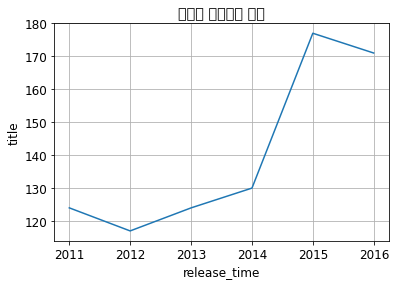

In [ ]:
sns.lineplot(data=y)
plt.title('연도별 개봉영화 갯수')
plt.grid()
plt.show()

In [ ]:
# 분기별 개봉영화 갯수
q = movie_with_index.resample('Q')['title'].count()
q

release_time
2010-03-31    25
2010-06-30    34
2010-09-30    32
2010-12-31    33
2011-03-31    29
2011-06-30    24
2011-09-30    31
2011-12-31    33
2012-03-31    28
2012-06-30    30
2012-09-30    29
2012-12-31    37
2013-03-31    27
2013-06-30    28
2013-09-30    31
2013-12-31    44
2014-03-31    33
2014-06-30    44
2014-09-30    48
2014-12-31    52
2015-03-31    34
2015-06-30    39
2015-09-30    46
2015-12-31    52
Freq: Q-DEC, Name: title, dtype: int64

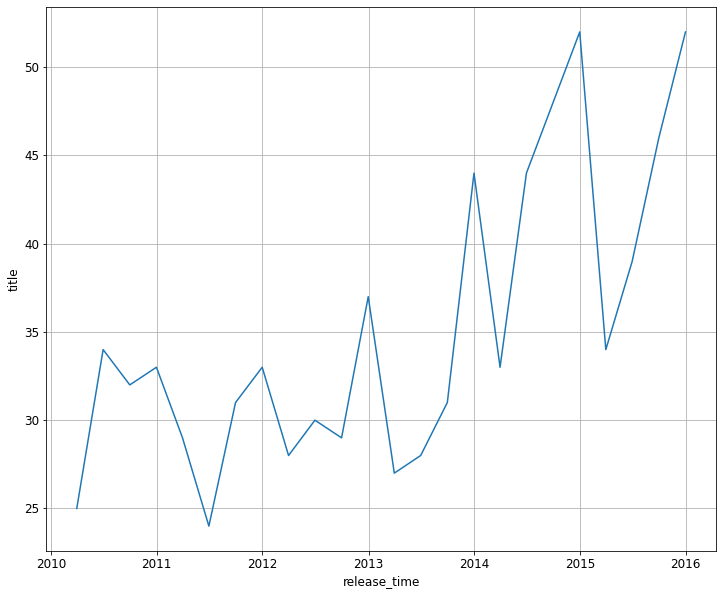

In [ ]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=q)
plt.grid()
plt.show()

In [ ]:
# 분기별로 시각화 - YoY, QoQ 방법 찾아보기.

In [ ]:
# 월별 
m = movie_with_index.resample('M')['title'].count()
m

release_time
2010-01-31    11
2010-02-28     7
2010-03-31     7
2010-04-30    13
2010-05-31    14
              ..
2015-08-31    13
2015-09-30    20
2015-10-31    18
2015-11-30    15
2015-12-31    19
Freq: M, Name: title, Length: 72, dtype: int64

In [ ]:
m.sort_values(ascending=False)

release_time
2014-10-31    23
2013-11-30    21
2015-09-30    20
2014-04-30    20
2015-12-31    19
              ..
2010-06-30     7
2010-03-31     7
2011-05-31     6
2012-02-29     6
2011-01-31     5
Name: title, Length: 72, dtype: int64

### time 칼럼 탐색

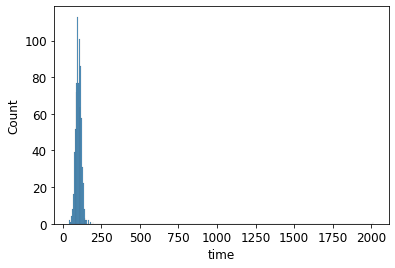

In [ ]:
sns.histplot(data=movie['time'])
plt.show()

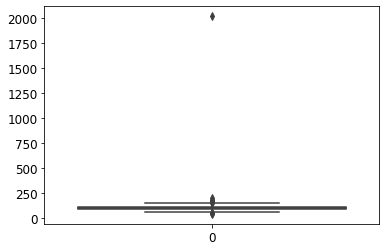

In [ ]:
sns.boxplot(data=movie['time'])
plt.show()     # 이상치가 한 개 있다.

### screening_rat 탐색

In [ ]:
movie['screening_rat'].value_counts()

청소년 관람불가    297
15세 관람가     275
12세 관람가     142
전체 관람가      129
Name: screening_rat, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_

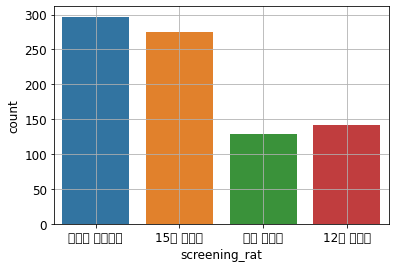

In [ ]:
sns.countplot(x='screening_rat', data=movie)
plt.grid()
plt.show()

### director 탐색

In [ ]:
movie['director'].value_counts()

# 614명의 감독이 있다.

홍상수    8
조성규    6
전규환    6
신재호    4
김성훈    4
      ..
이로이    1
문제용    1
송정우    1
김봉곤    1
송동윤    1
Name: director, Length: 614, dtype: int64

### dir_prev_bfnum 탐색

In [ ]:
movie.loc[:, ['director', 'dir_prev_bfnum']].dropna().sort_values(by='dir_prev_bfnum', ascending=False)

# na값 제거 후, 전작 관객 수 높은 순으로 정렬.

,director,dir_prev_bfnum
338,고구마,17615314.0
214,김민석,8801639.0
16,강형철,8223342.0
118,심형래,7855474.0
409,강형철,7838528.5
...,...,...
552,배형준,19.0
186,주경중,17.0
465,정용주,8.0
202,이성은,7.0


### dir_prev_num 탐색

In [ ]:
movie['dir_prev_num'].value_counts()

0    466
1    161
2    117
3     66
4     26
5      6
6      1
Name: dir_prev_num, dtype: int64

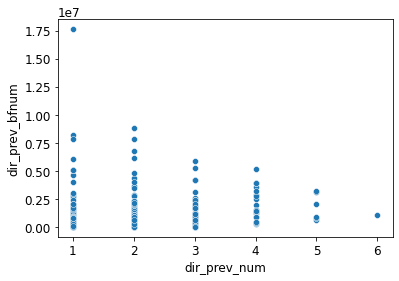

In [ ]:
# prev_num과 prev_bfnum이 상관관계가 있을까? - 없음.

sns.scatterplot(x='dir_prev_num', y='dir_prev_bfnum', data=movie)
plt.show()

### num_staff

In [ ]:
movie['num_staff'].value_counts()

0      47
1      23
3      21
2      16
17     11
       ..
499     1
519     1
583     1
75      1
579     1
Name: num_staff, Length: 354, dtype: int64

In [ ]:
movie['num_staff'].value_counts()[:10]

0     47
1     23
3     21
2     16
17    11
4     11
7     11
5     10
6     10
10     9
Name: num_staff, dtype: int64

### num_actor

In [ ]:
movie['num_actor'].value_counts()

2     230
3     201
4     149
5      87
1      48
6      41
7      25
8      20
0      13
10     10
9       5
11      5
13      3
14      2
16      2
25      1
22      1
Name: num_actor, dtype: int64

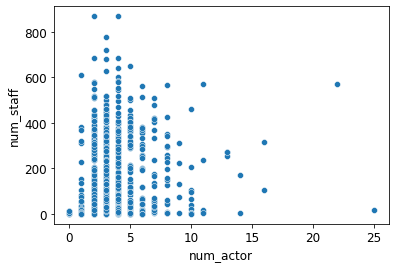

In [ ]:
sns.scatterplot(x='num_actor', y='num_staff', data=movie)
plt.show()

#  크게 상관관계는 없음.

## train 셋 탐색

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


### 관객 수 상위 10개 제목, 감독

In [ ]:
train.loc[:, ['title', 'director', 'box_off_num']].sort_values(by='box_off_num', ascending=False)[:10]

,title,director,box_off_num
372,국제시장,윤제균,14262766
362,도둑들,최동훈,12983841
530,7번방의 선물,이환경,12811435
498,암살,최동훈,12706663
460,"광해, 왕이 된 남자",추창민,12323595
122,변호인,양우석,11374879
496,설국열차,봉준호,9350351
101,관상,한재림,9135806
505,해적: 바다로 간 산적,이석훈,8666208
476,수상한 그녀,황동혁,8659725


### director 탐색

In [ ]:
# 감독의 갯수와 각 감독별 작품의 갯수를 파악해보자 - 변수로서 의미가 있는지 확인 위해.
np.unique(train['director'], return_counts=True)

(array(['New Pistol', '강석필', '강성옥', '강우석', '강의석', '강형철', '강효진', '강훈', '경순',
        '계윤식', '고구마', '고석진', '공귀현', '곽경택', '구모', '구봉회', '구수환', '구자홍',
        '구혜선', '국동석', '권오광', '권우정', '권중목', '권칠인', '권혁만', '권형진', '권효',
        '기대호', '김건', '김경만', '김경묵', '김곡', '김관철', '김광식', '김광태', '김규민', '김기덕',
        '김기영', '김기훈', '김달중', '김대성', '김대승', '김대우', '김대창', '김대현', '김덕수',
        '김동명', '김동빈', '김동원', '김동주', '김동후', '김명균', '김명서', '김민석', '김민욱',
        '김병곤', '김병준', '김봉곤', '김봉은', '김봉주', '김상만', '김상석', '김상진', '김상철',
        '김석윤', '김석정', '김선', '김선아', '김성균', '김성수', '김성제', '김성호', '김성홍',
        '김성훈', '김영진', '김영탁', '김용균', '김용화', '김익로', '김인식', '김일종', '김재수',
        '김재한', '김재환', '김정욱', '김정호', '김정환', '김정훈', '김조광수', '김종철', '김준권',
        '김지용', '김지운', '김지훈', '김진만', '김진무', '김진민', '김진열', '김진영', '김진홍',
        '김창만', '김철민', '김철한', '김태경', '김태곤', '김태균', '김태식', '김태용', '김태윤',
        '김태일', '김한민', '김현석', '김형주', '김혜정', '김호준', '김홍선', '김회근', '김효정',
        '김휘', '김희정', '나홍진', '남기웅', '남택수', '노덕', '노병하', '노성수', '노영석', 

In [ ]:
train['director'].value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [ ]:
# 감독에 따른 관객 수 평균
d_20 = train.groupby('director')['box_off_num'].mean().sort_values(ascending=False)
d_20 

director
윤제균    14262766.0
최동훈    12845252.0
양우석    11374879.0
봉준호     9350351.0
한재림     9135806.0
          ...    
진광교          36.0
이세일          10.0
고구마           8.0
김정호           2.0
노성수           1.0
Name: box_off_num, Length: 472, dtype: float64

In [ ]:
d_20[:20]

director
윤제균    14262766.0
최동훈    12845252.0
양우석    11374879.0
봉준호     9350351.0
한재림     9135806.0
황동혁     8659725.0
이석훈     8212959.5
김한민     7482180.0
추창민     6986501.0
장철수     6959083.0
이환경     6673546.0
이정범     6178665.0
강형철     5734539.5
허정      5604106.0
조의석     5508299.0
장재현     5443049.0
류승완     4944780.0
진모영     4802169.0
윤종빈     4720050.0
박정우     4515833.0
Name: box_off_num, dtype: float64

### distributor에 따른 관객 수

In [ ]:
d = train['distributor'].value_counts()[:10]
d

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

In [ ]:
# 위 배급사에 따른 box_off_num

# train[train['distributor']==d.index]['box_off_num'].mean()
d.index

Index(['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스', '인디스토리',
       '골든타이드픽처스', '(주) 케이알씨지', '(주) 영화사조제', '영화사 진진'],
      dtype='object')

In [ ]:
# 자연수 e 없애고, 숫자 그대로 표시하기.
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
d_10 = train.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False)
d_10

distributor
CJ E&M Pictures   4122337.00000
(주)쇼박스            3386656.30769
(주)아이필름코퍼레이션      3117859.00000
쇼박스(주)미디어플렉스      2634823.00000
영구아트무비            2541603.00000
                       ...     
나우콘텐츠                  54.00000
위드시네마                  46.00000
사람과 사람들                42.00000
고구마공작소                  8.00000
인피니티엔터테인먼트              2.00000
Name: box_off_num, Length: 169, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_

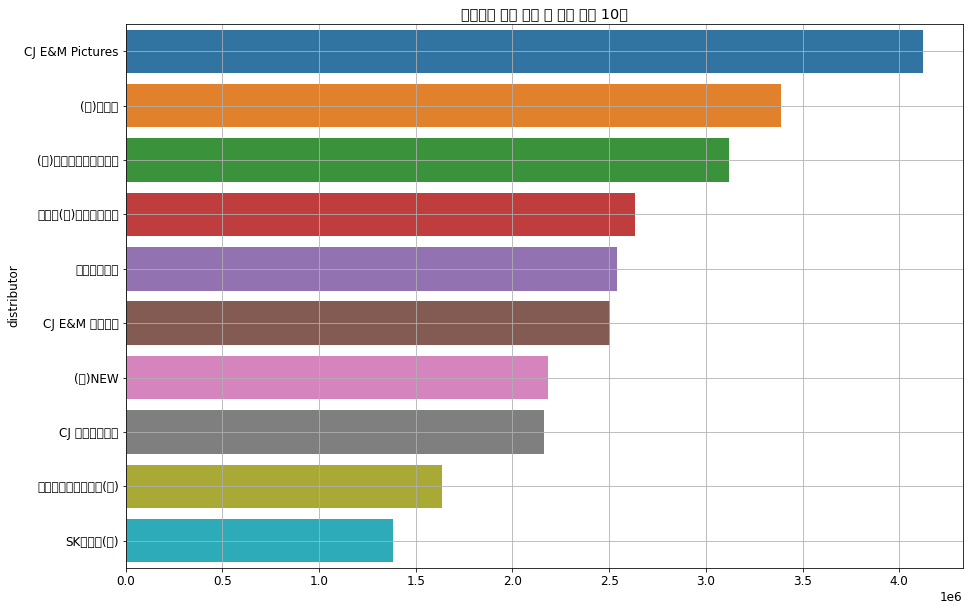

In [ ]:
# 배급사에 따른 관객 수 평균 상위 10개
plt.figure(figsize=(15, 10))
sns.barplot(x=d_10.values[:10], y=d_10.index[:10])
plt.title('배급사에 따른 관객 수 평균 상위 10개')
plt.grid()
plt.show()

### genre 별 관객 수 평균 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_

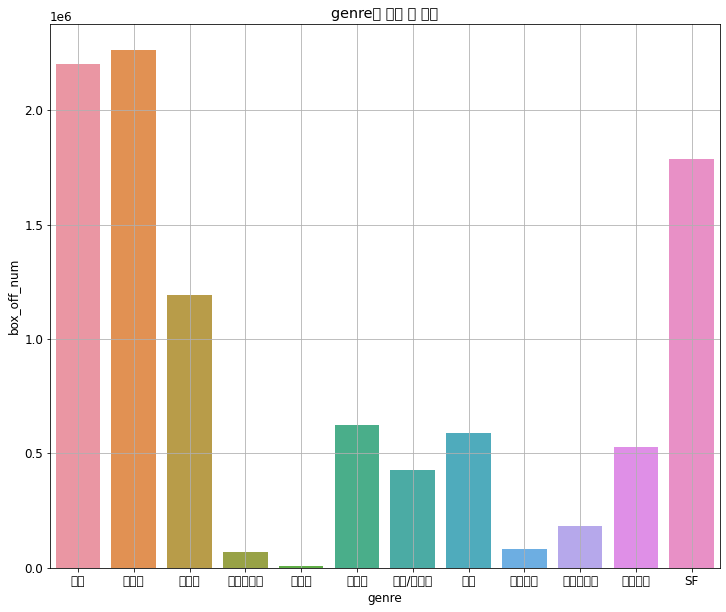

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='genre', y='box_off_num', data=train, ci=None)
plt.title('genre별 관객 수 평균')
plt.grid()
plt.show()

### release_time 별 관객수 평균

In [ ]:
# release_time	을 datetime으로 변경
train['release_time'] = pd.to_datetime(train['release_time'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [ ]:
train_with_index = train.set_index(train['release_time'])
train_with_index

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
release_time,,,,,,,,,,,,
2012-11-22,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
2015-11-19,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2013-06-05,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083
2012-07-12,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866
2010-11-04,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-13,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00000,1,510,7,1475091
2013-03-14,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00000,1,286,6,1716438
2010-09-30,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475


In [ ]:
# 연도별 관객 수 평균
y_mean = train_with_index.resample('Y')['box_off_num'].mean()
y_mean 

release_time
2010-12-31    541658.16667
2011-12-31    628867.13750
2012-12-31    945725.19318
2013-12-31   1007357.81053
2014-12-31    593884.49606
2015-12-31    595869.20833
Freq: A-DEC, Name: box_off_num, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

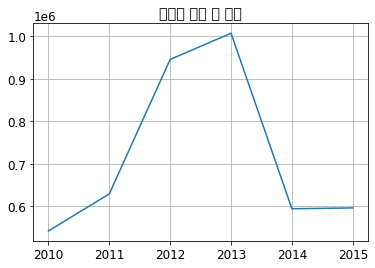

In [ ]:
sns.lineplot(x=[2010, 2011, 2012, 2013, 2014, 2015], y=y_mean.values)
# 그냥 y_mean으로 그래프 그리니까, x축이 2011, 2012,..., 2016으로 1년씩 밀려서 나와서, 
# 아예 x축 값을 지정함.

plt.title('연도별 관객 수 평균')
plt.grid()
plt.show()

In [ ]:
# 분기별 관객 수 평균
q_mean = train_with_index.resample('Q')['box_off_num'].mean()
q_mean 

release_time
2010-03-31    192450.06250
2010-06-30    346683.83333
2010-09-30    828843.80000
2010-12-31    665141.08000
2011-03-31    559116.21739
2011-06-30    702648.00000
2011-09-30    894476.73913
2011-12-31    368681.38095
2012-03-31    914626.18182
2012-06-30    552992.00000
2012-09-30   1547893.72000
2012-12-31    635469.42857
2013-03-31   1621999.13333
2013-06-30    645995.45455
2013-09-30   1269268.88889
2013-12-31    738285.32258
2014-03-31    655769.41667
2014-06-30    310773.13333
2014-09-30    628650.03125
2014-12-31    737679.75610
2015-03-31    542641.50000
2015-06-30    323101.33333
2015-09-30    646678.15625
2015-12-31    740906.16667
Freq: Q-DEC, Name: box_off_num, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

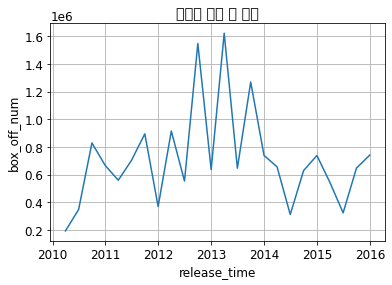

In [ ]:
sns.lineplot(data=q_mean)
plt.title('분기별 관객 수 평균')
plt.grid()
plt.show()

In [ ]:
# 월별 관객 수 평균
m_mean = train_with_index.resample('M')['box_off_num'].mean()
m_mean 

release_time
2010-01-31    190082.12500
2010-02-28      2558.00000
2010-03-31    387078.00000
2010-04-30    245552.00000
2010-05-31    258250.23077
                  ...     
2015-08-31    305482.50000
2015-09-30    335684.66667
2015-10-31    326036.21429
2015-11-30   1039519.53846
2015-12-31    869319.86667
Freq: M, Name: box_off_num, Length: 72, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_

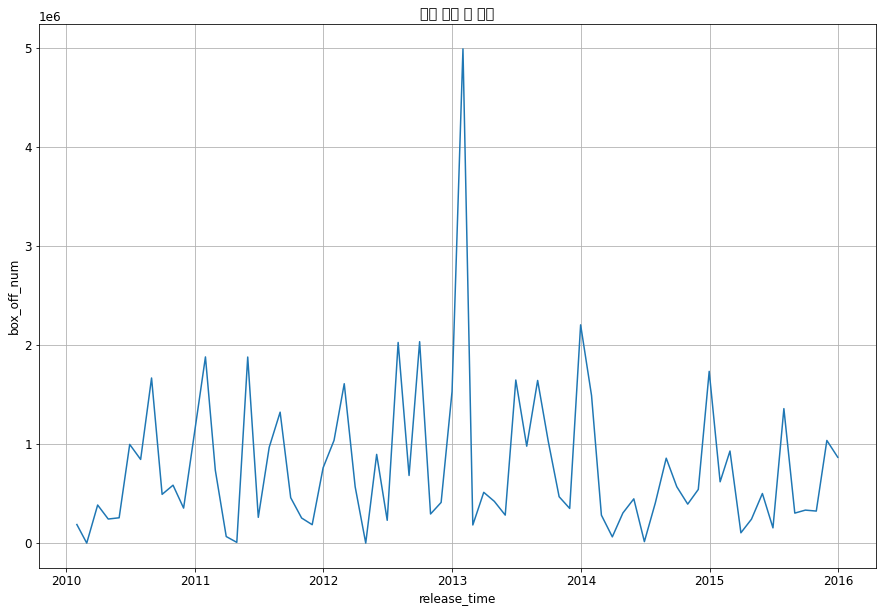

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=m_mean)
plt.title('월별 관객 수 평균')
plt.grid()
plt.show()

# 유난히 한 달의 관객수가 압도적으로 많다. 

In [ ]:
# 최대 월별 관객 수를 가지는 월 을 확인 : 2013-01이 가장 많은 관객 수를 가진다.

m_mean[m_mean == m_mean.values.max()]

release_time
2013-01-31   4994966.75000
Freq: M, Name: box_off_num, dtype: float64

In [ ]:
# 그러면, 2013년 1월에 극장에 걸렸던 영화들은 무엇일까?

# movie[movie['release_time']=='2013-01-..'] : 정규표현식으로 찾고 싶었는데 잘 못하겠다.
# 원래 데이터에서 날짜 문자열 -> datetime으로 변환, dt 함수 사용하기
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           843 non-null    object        
 1   distributor     843 non-null    object        
 2   genre           843 non-null    object        
 3   release_time    843 non-null    datetime64[ns]
 4   time            843 non-null    int64         
 5   screening_rat   843 non-null    object        
 6   director        843 non-null    object        
 7   dir_prev_bfnum  377 non-null    float64       
 8   dir_prev_num    843 non-null    int64         
 9   num_staff       843 non-null    int64         
 10  num_actor       843 non-null    int64         
 11  box_off_num     600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 79.2+ KB


In [ ]:
mv_2013 = movie[movie['release_time'].dt.year == 2013]
mv_2013_01 = mv_2013[mv_2013['release_time'].dt.month == 1]
mv_2013_01

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
216,나비와 바다,시네마 달,다큐멘터리,2013-01-24,89,12세 관람가,박배일,NaN,0,6,2,1240.00000
501,베드,(주)마운틴픽쳐스,멜로/로맨스,2013-01-17,91,청소년 관람불가,박철수,NaN,0,37,3,660.00000
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.50000,2,300,8,12811435.00000
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532.00000
740,오하이오 삿포로,어뮤즈,멜로/로맨스,2013-01-03,40,전체 관람가,김성준,NaN,0,1,2,NaN
741,마이 리틀 히어로,CJ 엔터테인먼트,드라마,2013-01-09,135,전체 관람가,김성훈,NaN,0,303,5,NaN
742,박수건달,(주)쇼박스,코미디,2013-01-09,127,15세 관람가,조진규,1468191.00000,1,320,4,NaN
743,배꼽,타임스토리,멜로/로맨스,2013-01-17,94,청소년 관람불가,박보상,NaN,0,211,4,NaN


In [ ]:
# 월별 관객 수가 가장 많았던 2013년 1월에 개봉한 영화들.

top_mv_2013_01 = mv_2013_01[['title', 'box_off_num']].sort_values(by='box_off_num', ascending=False)
top_mv_2013_01 

,title,box_off_num
530,7번방의 선물,12811435.00000
599,베를린,7166532.00000
216,나비와 바다,1240.00000
501,베드,660.00000
740,오하이오 삿포로,NaN
741,마이 리틀 히어로,NaN
742,박수건달,NaN
743,배꼽,NaN


In [ ]:
# 2013년 1월 개봉 영화의 관객 수 중, 
# 7번방의 선물이 64%, 베를린이 35%를 차지했다. 99%

top_mv_2013_01['box_off_num'] / top_mv_2013_01['box_off_num'].sum()

530   0.64122
599   0.35869
216   0.00006
501   0.00003
740       NaN
741       NaN
742       NaN
743       NaN
Name: box_off_num, dtype: float64

### time과 관객 수 상관관계

In [ ]:
train['time'].describe()

# [45, 89) : 0
# [89, 100) : 1
# [100, 114) : 2
# [114, 180) : 3

count   600.00000
mean    100.86333
std      18.09753
min      45.00000
25%      89.00000
50%     100.00000
75%     114.00000
max     180.00000
Name: time, dtype: float64

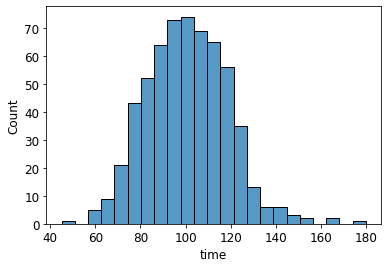

In [ ]:
sns.histplot(data=train['time'])
plt.show()

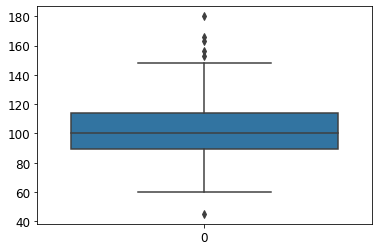

In [ ]:
sns.boxplot(data=train['time'])
plt.show()

In [ ]:
# time의 4분위수로 나누고, 그때의 관객 수 평균 확인해 보기.
# release time을 인덱스로 지정했던 train_with_index df에 테스트.

train_with_index['time']=pd.qcut(train_with_index['time'], 4, labels=(0, 1, 2, 3))
# 위 코드 실행했음. 

train_with_index.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
release_time,,,,,,,,,,,,
2012-11-22,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,1,청소년 관람불가,조병옥,NaN,0,91,2,23398
2015-11-19,내부자들,(주)쇼박스,느와르,2015-11-19,3,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2013-06-05,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,3,15세 관람가,장철수,220775.25000,4,343,4,6959083
2012-07-12,나는 공무원이다,(주)NEW,코미디,2012-07-12,2,전체 관람가,구자홍,23894.00000,2,20,6,217866
2010-11-04,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,2,15세 관람가,신근호,1.00000,1,251,2,483387


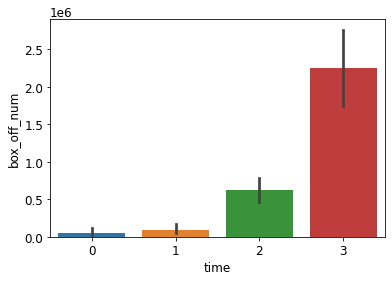

In [ ]:
sns.barplot(x=train_with_index['time'], y=train_with_index['box_off_num'])
plt.show()

# [45, 89) : 0
# [89, 100) : 1
# [100, 114) : 2
# [114, 180) : 3 
# 각 구간에 속하는 영화의 갯수는 동일하다(qcut으로 사분위수로 잘랐으므로.)
# 그런데 구간별로 평균 관객수가 다르다. - 영화의 시간이 관객 수에 영향을 미친다는 의미이다.

### 관람등급 별 관객 수 탐색

In [ ]:
# 관람등급 별 관객 수 총합
bon_sum = train.groupby('screening_rat')['box_off_num'].sum()
bon_sum 

screening_rat
12세 관람가      86188052
15세 관람가     251998766
전체 관람가       12429242
청소년 관람불가     74292991
Name: box_off_num, dtype: int64

In [ ]:
# 전체 box_off_num에서 등급별 비율?
ratio = (bon_sum / train['box_off_num'].sum()) * 100
ratio

screening_rat
12세 관람가    20.28388
15세 관람가    59.30652
전체 관람가      2.92515
청소년 관람불가   17.48445
Name: box_off_num, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_

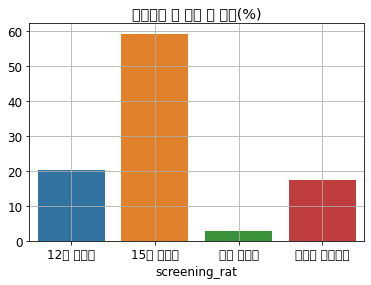

In [ ]:
sns.barplot(x=ratio.index, y=ratio.values)
plt.title('관람등급 별 관객 수 비율(%)')
plt.grid()
plt.show()

In [ ]:
bon_mean = train.groupby('screening_rat')['box_off_num'].mean()
bon_mean

screening_rat
12세 관람가     844980.90196
15세 관람가    1247518.64356
전체 관람가      135100.45652
청소년 관람불가    364181.32843
Name: box_off_num, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_

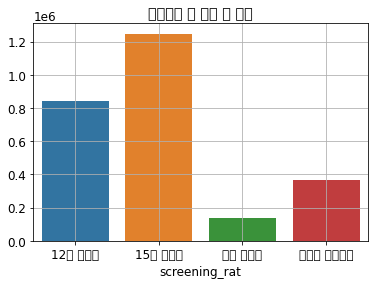

In [ ]:
sns.barplot(x=bon_mean.index, y=bon_mean.values)
plt.title('관람등급 별 관객 수 평균')
plt.grid()
plt.show()

In [ ]:
# 관람등급 갯수는? - train에서.
train['screening_rat'].value_counts() 

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

* 등급별 영화 수 자체는, '청소년 관람불가'가 가장 많으나, 관람객 비율은 '15세 관람가'가 가장 많다.

### dir_prev_bfnum(삭제 예정)와 관객 수 상관관계

In [ ]:
train['dir_prev_bfnum'].describe()

# null 값이 너무 많다.

count        270.00000
mean     1050442.89142
std      1791408.30346
min            1.00000
25%        20380.00000
50%       478423.62500
75%      1286568.62500
max     17615314.00000
Name: dir_prev_bfnum, dtype: float64

### dir_prev_num와 관객 수 상관 관계

In [ ]:
train['dir_prev_num'].value_counts()

# 이건 또 null값이 없네. 카테고리 변수임.

0    330
1    113
2     86
3     47
4     20
5      4
Name: dir_prev_num, dtype: int64

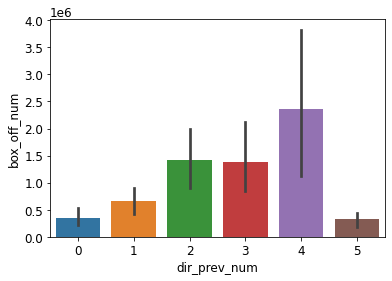

In [ ]:
# 전작 갯수와 관객 수 평균 그래프
sns.barplot(x='dir_prev_num', y='box_off_num', data=train)
plt.show()

# 전작 갯수에 따른 관객 수 '평균'이므로, (합이 아닌데도,)
# 전작 갯수에 따라 관객 수가 달랐다. 유의미한 변수이다.

### num_staff 와 관객 수 상관관계 - 없음.

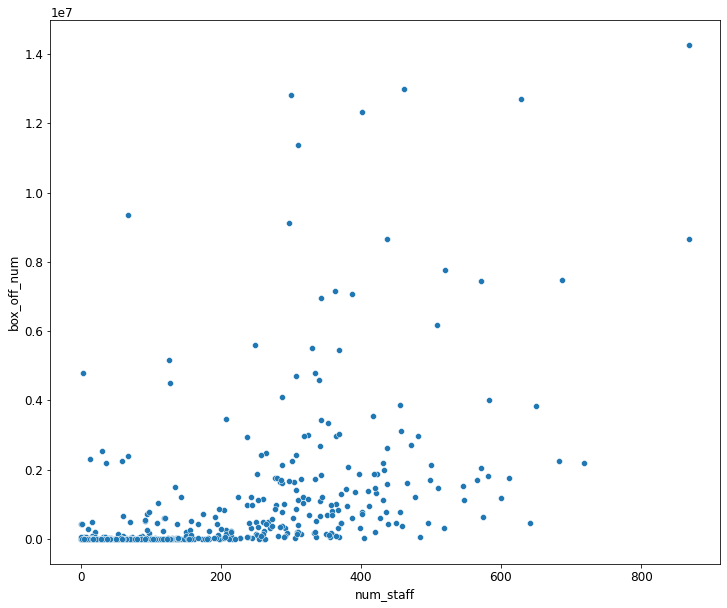

In [ ]:
# num_staff 과 관객 수 상관관계

plt.figure(figsize=(12, 10))
sns.scatterplot(x='num_staff', y='box_off_num', data=train)
plt.show()

# 크게 상관관계는 없어보인다.

### num_actor과 관객 수 상관관계 - 없음

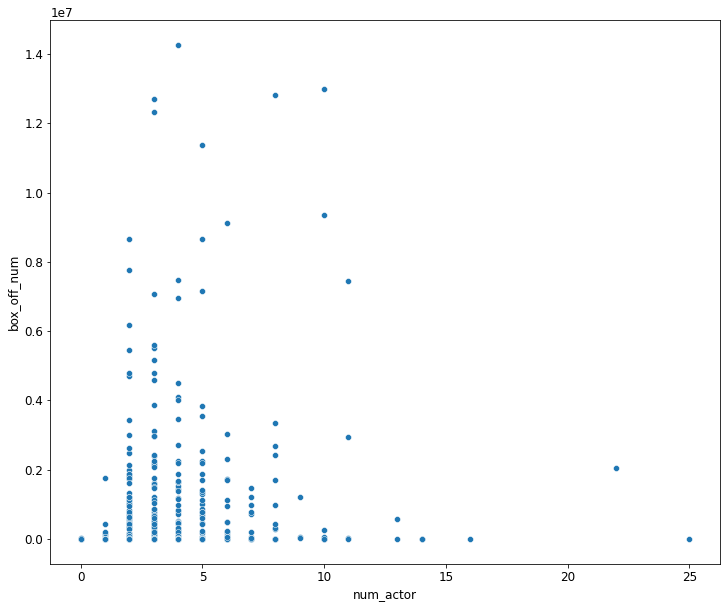

In [ ]:
# num_actor와 관객 수 상관관계

plt.figure(figsize=(12, 10))
sns.scatterplot(x='num_actor', y='box_off_num', data=train)
plt.show()
# 크게 상관관계는 없어보인다.

# 전처리 : movie, train, test 동시에

- title : 삭제
- (완)distributor: 상위 10개 카테고리 변수로 치환 후 
- (완) genre: 장르 원핫 인코딩
- release_time: 년/월 - 을 따로 칼럼으로 만들기
- time: 영향 있음. 4분위수로 나눠서 하기.
- screening_rat: 영향있음.	
- director: ?	
- (완)dir_prev_bfnum: 삭제
- dir_prev_num: 영향 있음.
- (완)num_staff	 : 삭제
- (완)num_actor	 : 삭제 
- box_off_num

In [ ]:
whole = [movie, train, test]

# 참고
# dic = {'S':0, 'C':1, 'Q':2}

# for dataset in whole:
#     dataset['Embarked'] = dataset['Embarked'].map(dic)

## 칼럼 삭제 : dir_prev_bfnum, num_staff, num_actor

* dir_prev_bfnum : 널값이 너무 많다.
* num_staff, num_actor : 관객 수와 상관관계가 없는 것 같다. 

In [ ]:
for dataset in whole:
    dataset.drop(columns=['dir_prev_bfnum', 'num_staff', 'num_actor'], inplace=True)

In [ ]:
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,23398.00000
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,7072501.00000
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,6959083.00000
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,217866.00000
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,483387.00000


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,2
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,4
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,3
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,1


## 데이터 셋 카피 해두기.

In [ ]:
movie_1 = movie.copy()
train_1 = train.copy()
test_1 = test.copy()
whole_1 = [movie_1, train_1, test_1]

## distributor : 상위 10개 배급사 원핫 인코딩

In [ ]:
# train set에서 평균 관객 수 상위 10개 배급사.
d_10[:10]

distributor
CJ E&M Pictures   4122337.00000
(주)쇼박스            3386656.30769
(주)아이필름코퍼레이션      3117859.00000
쇼박스(주)미디어플렉스      2634823.00000
영구아트무비            2541603.00000
CJ E&M 영화부문       2505309.33333
(주)NEW            2184404.83333
CJ 엔터테인먼트         2162742.46296
이십세기폭스코리아(주)      1637046.00000
SK텔레콤(주)          1383867.00000
Name: box_off_num, dtype: float64

In [ ]:
distri_10 = d_10[:10].index
distri_10

Index(['CJ E&M Pictures', '(주)쇼박스', '(주)아이필름코퍼레이션', '쇼박스(주)미디어플렉스', '영구아트무비',
       'CJ E&M 영화부문', '(주)NEW', 'CJ 엔터테인먼트', '이십세기폭스코리아(주)', 'SK텔레콤(주)'],
      dtype='object', name='distributor')

In [ ]:
dic = {}
for i, dis in enumerate(distri_10, start=1):
    dic[dis]= i
dic

{'(주)NEW': 7,
 '(주)쇼박스': 2,
 '(주)아이필름코퍼레이션': 3,
 'CJ E&M Pictures': 1,
 'CJ E&M 영화부문': 6,
 'CJ 엔터테인먼트': 8,
 'SK텔레콤(주)': 10,
 '쇼박스(주)미디어플렉스': 4,
 '영구아트무비': 5,
 '이십세기폭스코리아(주)': 9}

In [ ]:
# 이 상태로 그냥 원핫인코딩 하면, 모든 배급사에 대해서 하게 된다.
# 나는 그걸 원하는 것이 아니다. - 상위 10개 배급사에 대해서만 하길 원한다.
# 1) 상위 10개 배급사를 숫자 1~10로 치환하고, (나머지는 0)
# 2) 그 상태에서 원핫인코딩을 하면, 구분이 된다. 

# dic = {'S':0, 'C':1, 'Q':2}
# for dataset in whole:
#     dataset['Embarked'] = dataset['Embarked'].map(dic)

# 1)
for dataset in whole_1:
    dataset['distributor'] = dataset['distributor'].map(dic)

In [ ]:
train_1['distributor'].value_counts()  # 숫자로 변환되었다. 

8.00000     54
7.00000     30
2.00000     26
6.00000      3
9.00000      3
4.00000      2
1.00000      2
5.00000      1
3.00000      1
10.00000     1
Name: distributor, dtype: int64

* isin : https://jaeyung1001.tistory.com/64

In [ ]:
# 그 외 의 배급사들 0으로 채워주기.
for data in whole_1:
    data['distributor'].fillna(0, inplace=True)

In [ ]:
train_1.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,box_off_num
0,개들의 전쟁,0.00000,액션,2012-11-22,96,청소년 관람불가,조병옥,0,23398
1,내부자들,2.00000,느와르,2015-11-19,130,청소년 관람불가,우민호,2,7072501
2,은밀하게 위대하게,2.00000,액션,2013-06-05,123,15세 관람가,장철수,4,6959083
3,나는 공무원이다,7.00000,코미디,2012-07-12,101,전체 관람가,구자홍,2,217866
4,불량남녀,4.00000,코미디,2010-11-04,108,15세 관람가,신근호,1,483387


In [ ]:
# 2) 원핫인코딩 

# for 문이 안먹음..
# for data in whole_1:
#     data = pd.get_dummies(data = data, columns = ['distributor'], prefix = 'distri')

In [ ]:
train_1 = pd.get_dummies(data = train_1, columns = ['distributor'], prefix = 'distri')

In [ ]:
test_1 = pd.get_dummies(data = test_1, columns = ['distributor'], prefix = 'distri')

In [ ]:
movie_1 =  pd.get_dummies(data = movie_1, columns = ['distributor'], prefix = 'distri')

In [ ]:
train_1.head()

,title,genre,release_time,time,screening_rat,director,dir_prev_num,box_off_num,distri_0.0,distri_1.0,distri_2.0,distri_3.0,distri_4.0,distri_5.0,distri_6.0,distri_7.0,distri_8.0,distri_9.0,distri_10.0
0,개들의 전쟁,액션,2012-11-22,96,청소년 관람불가,조병옥,0,23398,1,0,0,0,0,0,0,0,0,0,0
1,내부자들,느와르,2015-11-19,130,청소년 관람불가,우민호,2,7072501,0,0,1,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,액션,2013-06-05,123,15세 관람가,장철수,4,6959083,0,0,1,0,0,0,0,0,0,0,0
3,나는 공무원이다,코미디,2012-07-12,101,전체 관람가,구자홍,2,217866,0,0,0,0,0,0,0,1,0,0,0
4,불량남녀,코미디,2010-11-04,108,15세 관람가,신근호,1,483387,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
test_1.head()

,title,genre,release_time,time,screening_rat,director,dir_prev_num,distri_0.0,distri_1.0,distri_2.0,distri_4.0,distri_7.0,distri_8.0,distri_9.0
0,용서는 없다,느와르,2010-01-07,125,청소년 관람불가,김형준,2,1,0,0,0,0,0,0
1,아빠가 여자를 좋아해,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,4,0,0,1,0,0,0,0
2,하모니,드라마,2010-01-28,115,12세 관람가,강대규,3,0,0,0,0,0,1,0
3,의형제,액션,2010-02-04,116,15세 관람가,장훈,2,0,0,1,0,0,0,0
4,평행 이론,공포,2010-02-18,110,15세 관람가,권호영,1,0,0,0,0,0,1,0


In [ ]:
movie_1.head()

,title,genre,release_time,time,screening_rat,director,dir_prev_num,box_off_num,distri_0.0,distri_1.0,distri_2.0,distri_3.0,distri_4.0,distri_5.0,distri_6.0,distri_7.0,distri_8.0,distri_9.0,distri_10.0
0,개들의 전쟁,액션,2012-11-22,96,청소년 관람불가,조병옥,0,23398.00000,1,0,0,0,0,0,0,0,0,0,0
1,내부자들,느와르,2015-11-19,130,청소년 관람불가,우민호,2,7072501.00000,0,0,1,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,액션,2013-06-05,123,15세 관람가,장철수,4,6959083.00000,0,0,1,0,0,0,0,0,0,0,0
3,나는 공무원이다,코미디,2012-07-12,101,전체 관람가,구자홍,2,217866.00000,0,0,0,0,0,0,0,1,0,0,0
4,불량남녀,코미디,2010-11-04,108,15세 관람가,신근호,1,483387.00000,0,0,0,0,1,0,0,0,0,0,0


## genre 원핫인코딩

In [ ]:
train_1 = pd.get_dummies(data = train_1, columns = ['genre'])
test_1 = pd.get_dummies(data = test_1, columns = ['genre'])
movie_1 =  pd.get_dummies(data = movie_1, columns = ['genre'])

In [ ]:
train_1.head()

,title,release_time,time,screening_rat,director,dir_prev_num,box_off_num,distri_0.0,distri_1.0,distri_2.0,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,개들의 전쟁,2012-11-22,96,청소년 관람불가,조병옥,0,23398,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,내부자들,2015-11-19,130,청소년 관람불가,우민호,2,7072501,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,2013-06-05,123,15세 관람가,장철수,4,6959083,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,나는 공무원이다,2012-07-12,101,전체 관람가,구자홍,2,217866,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,불량남녀,2010-11-04,108,15세 관람가,신근호,1,483387,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## realease time 년/월 컬럼 추가, 원핫인코딩

* https://steadiness-193.tistory.com/22

In [ ]:
ymd = train_1['release_time'].astype('str').str.split('-',)
ymd

0      [2012, 11, 22]
1      [2015, 11, 19]
2      [2013, 06, 05]
3      [2012, 07, 12]
4      [2010, 11, 04]
            ...      
595    [2014, 08, 13]
596    [2013, 03, 14]
597    [2010, 09, 30]
598    [2015, 05, 14]
599    [2013, 01, 30]
Name: release_time, Length: 600, dtype: object

In [ ]:
train_1['연'] = ymd.str.get(0)

In [ ]:
train_1['월'] = ymd.str.get(1)

In [ ]:
for data in [test_1, movie_1]:
    ymd = data['release_time'].astype('str').str.split('-')
    data['연'] = ymd.str.get(0)
    data['월'] = ymd.str.get(1)

In [ ]:
# 기존의 release_time 칼럼 삭제

for data in [train_1, test_1, movie_1]:
    data.drop(columns='release_time', inplace=True)

In [ ]:
# train_1 = pd.get_dummies(data = train_1, columns = ['월'], prefix = 'month') 

In [ ]:
# # 추가된 연, 월 컬럼으로 원핫인코딩

# for문이 안먹어
# for dataset in [train_1, test_1, movie_1]:
#     for ym in ['연', '월']:
#         dataset = pd.get_dummies(data = dataset, columns = [ym]) 

In [ ]:
# for ym in ['연', '월']:
#     dataset = pd.get_dummies(data = train_1, columns = [ym]) 

In [ ]:
train_1 = pd.get_dummies(data = train_1, columns = ['연', '월']) 

In [ ]:
test_1 = pd.get_dummies(data = test_1, columns = ['연', '월']) 
movie_1 = pd.get_dummies(data = movie_1, columns = ['연', '월']) 

## time 4분위수 기준 스케일링

In [ ]:
train_1['time']=pd.qcut(train_1['time'], 4, labels=(0, 1, 2, 3))
test_1['time']=pd.qcut(test_1['time'], 4, labels=(0, 1, 2, 3))
movie_1['time']=pd.qcut(movie_1['time'], 4, labels=(0, 1, 2, 3))

In [ ]:
train_1.head()

,title,time,screening_rat,director,dir_prev_num,box_off_num,distri_0.0,distri_1.0,distri_2.0,distri_3.0,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,개들의 전쟁,1,청소년 관람불가,조병옥,0,23398,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,내부자들,3,청소년 관람불가,우민호,2,7072501,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,은밀하게 위대하게,3,15세 관람가,장철수,4,6959083,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,나는 공무원이다,2,전체 관람가,구자홍,2,217866,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,불량남녀,2,15세 관람가,신근호,1,483387,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 관람등급 원핫인코딩

In [ ]:
whole_1 = [train_1, test_1, movie_1]

In [ ]:
# 또 안먹어
# for datasets in whole_1:
#     datasets = pd.get_dummies(data = datasets, columns = ['screening_rat']) 

In [ ]:
train_1 = pd.get_dummies(data = train_1, columns = ['screening_rat']) 

In [ ]:
test_1 = pd.get_dummies(data = test_1, columns = ['screening_rat']) 
movie_1 = pd.get_dummies(data = movie_1, columns = ['screening_rat']) 

In [ ]:
test_1.head()

,title,time,director,dir_prev_num,distri_0.0,distri_1.0,distri_2.0,distri_4.0,distri_7.0,distri_8.0,...,월_07,월_08,월_09,월_10,월_11,월_12,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,용서는 없다,3,김형준,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,아빠가 여자를 좋아해,2,이광재,4,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,하모니,3,강대규,3,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,의형제,3,장훈,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,평행 이론,2,권호영,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## title, director 삭제

In [ ]:
for dataset in [train_1, test_1, movie_1]:
    dataset.drop(columns=['title', 'director'], inplace=True)

In [ ]:
train_1.head()

,time,dir_prev_num,box_off_num,distri_0.0,distri_1.0,distri_2.0,distri_3.0,distri_4.0,distri_5.0,distri_6.0,...,월_07,월_08,월_09,월_10,월_11,월_12,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,1,0,23398,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3,2,7072501,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,4,6959083,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,2,217866,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2,1,483387,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


## dir_prev_num 원핫인코딩

In [ ]:
train_1 = pd.get_dummies(data = train_1, columns = ['dir_prev_num']) 
test_1 = pd.get_dummies(data = test_1, columns = ['dir_prev_num']) 
movie_1 = pd.get_dummies(data = movie_1, columns = ['dir_prev_num']) 

In [ ]:
train_1.head()

,time,box_off_num,distri_0.0,distri_1.0,distri_2.0,distri_3.0,distri_4.0,distri_5.0,distri_6.0,distri_7.0,...,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,dir_prev_num_0,dir_prev_num_1,dir_prev_num_2,dir_prev_num_3,dir_prev_num_4,dir_prev_num_5
0,1,23398,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,3,7072501,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,3,6959083,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2,217866,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2,483387,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
test_1.head()

,time,distri_0.0,distri_1.0,distri_2.0,distri_4.0,distri_7.0,distri_8.0,distri_9.0,genre_SF,genre_공포,...,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,dir_prev_num_0,dir_prev_num_1,dir_prev_num_2,dir_prev_num_3,dir_prev_num_4,dir_prev_num_5,dir_prev_num_6
0,3,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
movie_1.head()

,time,box_off_num,distri_0.0,distri_1.0,distri_2.0,distri_3.0,distri_4.0,distri_5.0,distri_6.0,distri_7.0,...,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,dir_prev_num_0,dir_prev_num_1,dir_prev_num_2,dir_prev_num_3,dir_prev_num_4,dir_prev_num_5,dir_prev_num_6
0,1,23398.00000,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,3,7072501.00000,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,3,6959083.00000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2,217866.00000,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,2,483387.00000,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# 모델링

* 모델 생성 -> 학습 -> 평가
* 교차검증으로 정확도 테스트.

## 데이터 셋 정의

In [ ]:
y = train_1['box_off_num'].values.copy()

In [ ]:
train_1.drop('box_off_num', axis=1, inplace=True)

In [ ]:
movie_1.drop('box_off_num', axis=1, inplace=True)

In [ ]:
train_1.head()

,time,distri_0.0,distri_1.0,distri_2.0,distri_3.0,distri_4.0,distri_5.0,distri_6.0,distri_7.0,distri_8.0,...,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,dir_prev_num_0,dir_prev_num_1,dir_prev_num_2,dir_prev_num_3,dir_prev_num_4,dir_prev_num_5
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,3,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X = train_1.values.copy()

In [ ]:
X[:5]

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0],
       [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0],
       [3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0],
       [2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
y[:5]

array([  23398, 7072501, 6959083,  217866,  483387])

## 모델 Import

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import mean_squared_error

## KNN

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X, y)
score = cross_validate(knn, X, y, n_jobs=-1, return_train_score=True)

In [ ]:
print('train 점수 평균: ' + str(round(np.mean(score['train_score'])*100, 2)))

train 점수 평균: 52.35


In [ ]:
print('test 점수 평균: ' + str(round(np.mean(score['test_score'])*100, 2)))

test 점수 평균: 24.5


In [ ]:
pred = knn.predict(X)
np.sqrt(mean_squared_error(pred, y))

1237740.4044560671

## SVM

In [ ]:
svr = SVR()

svr.fit(X, y)

score = cross_validate(svr, X, y, n_jobs=-1, return_train_score=True)
print('train 점수 평균: ' + str(round(np.mean(score['train_score'])*100, 2)))
print('test 점수 평균: ' + str(round(np.mean(score['test_score'])*100, 2)))

train 점수 평균: -14.55
test 점수 평균: -15.32


In [ ]:
pred = svr.predict(X)
np.sqrt(mean_squared_error(pred, y))

1954431.5285540721

## decision tree

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X, y)
score = cross_validate(tree, X, y, n_jobs=-1, return_train_score=True)
print('train 점수 평균: ' + str(round(np.mean(score['train_score'])*100, 2)))
print('test 점수 평균: ' + str(round(np.mean(score['test_score'])*100, 2)))

train 점수 평균: 99.37
test 점수 평균: -37.14


In [ ]:
pred = tree.predict(X)
np.sqrt(mean_squared_error(pred, y))

141895.90787145792

## 랜던포레스트

In [ ]:
forest = RandomForestRegressor()
forest.fit(X, y)
score = cross_validate(forest, X, y, n_jobs=-1, return_train_score=True)
print('train 점수 평균: ' + str(round(np.mean(score['train_score'])*100, 2)))
print('test 점수 평균: ' + str(round(np.mean(score['test_score'])*100, 2)))

train 점수 평균: 89.11
test 점수 평균: 19.11


In [ ]:
pred = forest.predict(X)
np.sqrt(mean_squared_error(pred, y))

623339.9976790645

## linear regression

In [ ]:
lin = LinearRegression()
lin.fit(X, y)
score = cross_validate(lin, X, y, n_jobs=-1, return_train_score=True)
print('train 점수 평균: ' + str(round(np.mean(score['train_score'])*100, 2)))
print('test 점수 평균: ' + str(round(np.mean(score['test_score'])*100, 2)))

train 점수 평균: 41.18
test 점수 평균: -1.3932092801119818e+24


In [ ]:
pred = lin.predict(X)
np.sqrt(mean_squared_error(pred, y))

1425291.5488981293

## SGD

In [ ]:
sgd = SGDRegressor()
sgd.fit(X, y)
score = cross_validate(sgd, X, y, n_jobs=-1, return_train_score=True)
print('train 점수 평균: ' + str(round(np.mean(score['train_score'])*100, 2)))
print('test 점수 평균: ' + str(round(np.mean(score['test_score'])*100, 2)))

train 점수 평균: 39.26
test 점수 평균: 23.29


In [ ]:
pred = sgd.predict(X)
np.sqrt(mean_squared_error(pred, y))

1437387.983733474

# 예측???? - KNN

In [ ]:
train_1.columns

Index(['time', 'distri_0.0', 'distri_1.0', 'distri_2.0', 'distri_3.0',
       'distri_4.0', 'distri_5.0', 'distri_6.0', 'distri_7.0', 'distri_8.0',
       'distri_9.0', 'distri_10.0', 'genre_SF', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디', '연_2010',
       '연_2011', '연_2012', '연_2013', '연_2014', '연_2015', '월_01', '월_02',
       '월_03', '월_04', '월_05', '월_06', '월_07', '월_08', '월_09', '월_10', '월_11',
       '월_12', 'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가', 'dir_prev_num_0',
       'dir_prev_num_1', 'dir_prev_num_2', 'dir_prev_num_3', 'dir_prev_num_4',
       'dir_prev_num_5'],
      dtype='object')

In [ ]:
test_1.columns

Index(['time', 'distri_0.0', 'distri_1.0', 'distri_2.0', 'distri_4.0',
       'distri_7.0', 'distri_8.0', 'distri_9.0', 'genre_SF', 'genre_공포',
       'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬',
       'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       '연_2010', '연_2011', '연_2012', '연_2013', '연_2014', '연_2015', '월_01',
       '월_02', '월_03', '월_04', '월_05', '월_06', '월_07', '월_08', '월_09', '월_10',
       '월_11', '월_12', 'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가', 'dir_prev_num_0',
       'dir_prev_num_1', 'dir_prev_num_2', 'dir_prev_num_3', 'dir_prev_num_4',
       'dir_prev_num_5', 'dir_prev_num_6'],
      dtype='object')

In [ ]:
test_1.columns

Index(['time', 'distri_0.0', 'distri_1.0', 'distri_2.0', 'distri_4.0',
       'distri_7.0', 'distri_8.0', 'distri_9.0', 'genre_SF', 'genre_공포',
       'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬',
       'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       '연_2010', '연_2011', '연_2012', '연_2013', '연_2014', '연_2015', '월_01',
       '월_02', '월_03', '월_04', '월_05', '월_06', '월_07', '월_08', '월_09', '월_10',
       '월_11', '월_12', 'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가', 'dir_prev_num_0',
       'dir_prev_num_1', 'dir_prev_num_2', 'dir_prev_num_3', 'dir_prev_num_4',
       'dir_prev_num_5', 'dir_prev_num_6'],
      dtype='object')

In [ ]:
test_1.insert(4, 'distri_3.0', 0)

In [ ]:
test_1.insert(6, 'distri_5.0', 0)

In [ ]:
test_1.insert(7, 'distri_6.0', 0)

In [ ]:
test_1.columns

Index(['time', 'distri_0.0', 'distri_1.0', 'distri_2.0', 'distri_3.0',
       'distri_4.0', 'distri_5.0', 'distri_6.0', 'distri_7.0', 'distri_8.0',
       'distri_9.0', 'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리',
       'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스',
       'genre_애니메이션', 'genre_액션', 'genre_코미디', '연_2010', '연_2011', '연_2012',
       '연_2013', '연_2014', '연_2015', '월_01', '월_02', '월_03', '월_04', '월_05',
       '월_06', '월_07', '월_08', '월_09', '월_10', '월_11', '월_12',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가', 'dir_prev_num_0',
       'dir_prev_num_1', 'dir_prev_num_2', 'dir_prev_num_3', 'dir_prev_num_4',
       'dir_prev_num_5', 'dir_prev_num_6'],
      dtype='object')

In [ ]:
X_te = test_1.values.copy()

In [ ]:
clf = KNeighborsRegressor()
clf.fit(X, y)
prediction = clf.predict(X_te)

In [ ]:
prediction[:5]

array([ 512509.2,  566942.6, 4184281.8, 2095860.6, 1530897.8])

In [ ]:
submission_csv = '/content/drive/MyDrive/Colab Notebooks/스터디/2. movie/submission.csv'

In [ ]:
submission = pd.read_csv(submission_csv)

In [ ]:
submission['box_off_num']=prediction

In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,512509.20000
1,아빠가 여자를 좋아해,566942.60000
2,하모니,4184281.80000
3,의형제,2095860.60000
4,평행 이론,1530897.80000


In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/스터디/2. movie/sub_1.csv', index=False)